In [120]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

### 1. Load data and initial inspection

In [121]:
df = pd.read_csv(r"RUS_combined_data.csv")
df.head()   

,Unnamed: 0,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount
0,0,35648046,TOYOTA,SEQUOIA,1/1/2020 0:03,А/д Бишкек - Торугарт. г. Кемин. 102 км.,Превышение установленной скорости движения на ...,3000
1,1,35648049,MITSUBISHI,COLT,1/1/2020 0:06,"А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км",Превышение установленной скорости движения на ...,3000
2,2,35648071,HYUNDAI,ELANTRA,1/1/2020 0:20,"А/д Биш. Торугарт, 20км., с. Люксембург",Превышение установленной скорости движения на ...,3000
3,3,35648091,MERCEDES-BENZ,SPRINTER 311,1/1/2020 0:15,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахм...",Невыполнение требований ПДД об остановке перед...,1000
4,4,35648093,MERCEDES-BENZ,E 240,1/1/2020 0:17,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,1000


In [122]:
if "Unnamed: 0" in df.columns:
    print('Дропнул эксель колонну, так как она не нужна жиги')
    df = df.drop(columns=["Unnamed: 0"])
df.info()

Дропнул эксель колонну, так как она не нужна жиги
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354392 entries, 0 to 2354391
Data columns (total 7 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   id                       int64 
 1   car_brand                object
 2   car_model                object
 3   violation_date           object
 4   crossroad_name           object
 5   violation_protocol_name  object
 6   violation_ammount        int64 
dtypes: int64(2), object(5)
memory usage: 125.7+ MB


In [123]:
df.isnull().sum()
df.shape

(2354392, 7)

In [124]:
df = df.dropna()
df.shape

(2354369, 7)

In [125]:
print('Чекаем являются ли эти колонки уникалными')
df.nunique()

Чекаем являются ли эти колонки уникалными


id                         1915019
car_brand                      242
car_model                     3194
violation_date             1978515
crossroad_name                 552
violation_protocol_name         20
violation_ammount                4
dtype: int64

In [126]:
if df["id"].is_unique:
    print("id уникален, всё ок")
else:
    print("id НЕ уникален, есть дубликаты")
total_rows = len(df)
unique_ids = df["id"].nunique()

print("Всего строк:", total_rows)
print("Уникальных id:", unique_ids)

id НЕ уникален, есть дубликаты
Всего строк: 2354369
Уникальных id: 1915019


In [127]:
dup_ids = df.loc[df["id"].duplicated(), "id"]
dup_ids.head()

256337    206208
256342     91231
256350     38233
256359     63396
256379    167667
Name: id, dtype: int64

In [128]:
print('Хочу выяснить сфигали они не уникальны')
print('Как будто тут один и тот же человек нарушает или машина')
df[df["id"] == 38233]

Хочу выяснить сфигали они не уникальны
Как будто тут один и тот же человек нарушает или машина


,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount
256349,38233,HONDA,FIT,2019-03-04 01:16:21.000,"А/д Бишкек –Торугарт 10,3км","Нарушение «превышение скорости» свыше 20 км/ч,...",3000
256350,38233,HONDA,FIT,2019-03-04 01:18:20.000,А/д Бишкек - Торугарт 12.9км,"Нарушение «превышение скорости» свыше 20 км/ч,...",3000
282567,38233,HONDA,FIT,2019-03-21 03:34:27.000,"А/д Бишкек –Торугарт 10,3км","Нарушение «превышение скорости» свыше 20 км/ч,...",3000
328861,38233,HONDA,FIT,2019-04-19 08:08:53.000,г. Бишкек ул.Ж.Жолу д.291,"Нарушение «превышение скорости» свыше 10 км/ч,...",1000


In [129]:
print('Количество строк где все колонны похожие:', df.duplicated().sum())
print('Дропаю только эти абсолютно похожие строки')
df.drop_duplicates(inplace=True)
print('Shape of df', df.shape)

Количество строк где все колонны похожие: 130725
Дропаю только эти абсолютно похожие строки
Shape of df (2223644, 7)


In [130]:
df.head()

,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount
0,35648046,TOYOTA,SEQUOIA,1/1/2020 0:03,А/д Бишкек - Торугарт. г. Кемин. 102 км.,Превышение установленной скорости движения на ...,3000
1,35648049,MITSUBISHI,COLT,1/1/2020 0:06,"А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км",Превышение установленной скорости движения на ...,3000
2,35648071,HYUNDAI,ELANTRA,1/1/2020 0:20,"А/д Биш. Торугарт, 20км., с. Люксембург",Превышение установленной скорости движения на ...,3000
3,35648091,MERCEDES-BENZ,SPRINTER 311,1/1/2020 0:15,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахм...",Невыполнение требований ПДД об остановке перед...,1000
4,35648093,MERCEDES-BENZ,E 240,1/1/2020 0:17,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,1000


In [131]:
print('Видим что формат дат такая фигня')
df["violation_date"].astype(str).value_counts().sample(100)
    

Видим что формат дат такая фигня


violation_date
20/12/2020 01:09:02         1
2019-07-06 03:39:46.000     1
08/06/2020 13:23:14         1
03/09/2019 16:20:28         1
02/03/2021 15:05:42         1
                           ..
2019-07-28 16:48:59.000     1
03/09/2020 13:40:36         1
02/12/2019 13:30:09         1
11:25.0                    34
16/01/2020 11:01:13         1
Name: count, Length: 100, dtype: int64

In [132]:
df[df['violation_date'] == '51:00.0']

,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount
1303318,149640,MERCEDES-BENZ,200E,51:00.0,"г. Бишкек, пересечение пр. Чуй - ул. И.Павлова",Невыполнение требований ПДД об остановке перед...,3000
1303646,156077,BMW,X6,51:00.0,г.Бишкек Путепровод по ул.Ибраимова,"Нарушение «превышение скорости» свыше 10 км/ч,...",1000
1304679,12528,HONDA,FIT,51:00.0,"г.Бишкек, ул. Масалиева д. 49","Нарушение «превышение скорости» свыше 10 км/ч,...",1000
1312166,102797,MERCEDES-BENZ,SPRINTER 313,51:00.0,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,3000
1312904,190636,TOYOTA,IST,51:00.0,"г. Бишкек, пересечение пр. Жибек Жолу – ул. Ку...",Невыполнение требований дорожных знаков,3000
1313993,84931,AUDI,A6,51:00.0,"А/д Бишкек –Торугарт 10,3км","Нарушение «превышение скорости» свыше 10 км/ч,...",1000
1314894,168554,NISSAN,CEFIRO,51:00.0,г.Бишкек Путепровод по ул. 7-Апреля,"Нарушение «превышение скорости» свыше 20 км/ч,...",3000
1317497,29600,NISSAN,PATROL,51:00.0,"г. Бишкек, путепровод по пр. Байтик Баатыра","Нарушение «превышение скорости» свыше 10 км/ч,...",1000
1321645,1303,TOYOTA,IST,51:00.0,"г. Бишкек, ж.м. Арча-Бешик ул. Садырбаева № 371/2","Нарушение «превышение скорости» свыше 10 км/ч,...",1000
1323153,205140,LEXUS,GX 470,51:00.0,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Фучика",Невыполнение требований ПДД об остановке перед...,3000


In [133]:
df[['raw_date', 'raw_time']] = (
    df['violation_date']
    .astype(str)
    .str.split(' ', n=1, expand=True)
)
print('raw_time is null', df['raw_time'].isnull().sum(), 'shape=', df.shape)
df.sample(50)

raw_time is null 134560 shape= (2223644, 9)


,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount,raw_date,raw_time
1074635,37213870,HONDA,ACCORD,30/06/2020 00:22:16,"г. Бишкек, пересечение улиц М.Горького – Ч.Айт...","Проезд на запрещенный сигнал светофора, либо ж...",3000,30/06/2020,00:22:16
1445679,37431133,FORD,TRANSIT,02/08/2020 22:51:48,"г. Бишкек, пересечение улиц Б.Алыкулова – М.Ом...",Превышение установленной скорости движения на ...,1000,02/08/2020,22:51:48
514114,38786311,LEXUS,RX 400,19/03/2021 16:16:17,"г. Бишкек, пересечение бульв. Молодой Гвардии ...",Нарушение требований разметки проезжей части д...,1000,19/03/2021,16:16:17
706331,127344,HONDA,STREAM,2019-05-18 13:25:17.000,"г. Бишкек, пересечение улиц Жибек Жолу - Лерм...",Невыполнение требований ПДД об остановке перед...,3000,2019-05-18,13:25:17.000
71075,38471647,HYUNDAI,SONATA,03/01/2021 13:33:15,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований дорожных знаков,1000,03/01/2021,13:33:15
347651,3246,MERCEDES-BENZ,E 270,2019-04-29 12:13:05.000,"А/д.Бишкек – Кордай. с. Ленинское. 15,5 км.","Нарушение «превышение скорости» свыше 40 км/ч,...",5500,2019-04-29,12:13:05.000
1621566,34782973,AUDI,100,10/09/2019 09:22:27,"Чуйский р/н с.Жаны-Чек, Основная а/д ""Бишкек-Н...",Превышение установленной скорости движения на ...,3000,10/09/2019,09:22:27
946661,100454,BMW,535,2019-06-30 15:53:04.000,"А/д Бишкек - Аэропорт «Манас» с. Достук. 10,2 км.","Нарушение «превышение скорости» свыше 10 км/ч,...",1000,2019-06-30,15:53:04.000
95964,38523476,VOLKSWAGEN,VENTO,17/01/2021 13:07:44,"Объездная а/д. ""Бишкек-Нарын-Торугарт"" - 38,00...",Превышение установленной скорости движения на ...,3000,17/01/2021,13:07:44
2336849,38411751,MERCEDES-BENZ,SPRINTER 308,23/12/2020 13:18:52,"г. Бишкек, мкр. Асанбай № 41 по ул. Токомбаева.",Превышение установленной скорости движения на ...,1000,23/12/2020,13:18:52


In [134]:
df.dropna(subset=['raw_time'], inplace=True)
df.shape

(2089084, 9)

In [135]:
df["raw_date"] = df["raw_date"].astype(str).str.strip()

In [136]:
s = df["raw_date"].astype(str).str.strip()

mask_dash = s.str.fullmatch(r"\d{4}-\d{2}-\d{2}")

mask_slash = s.str.fullmatch(r"\d{1,2}/\d{1,2}/\d{4}")

norm_dt = pd.Series(pd.NaT, index=df.index, dtype="datetime64[ns]")

norm_dt[mask_dash] = pd.to_datetime(
    s[mask_dash],
    format="%Y-%m-%d",
    errors="coerce"
)

norm_dt[mask_slash] = pd.to_datetime(
    s[mask_slash],
    format="%d/%m/%Y",
    errors="coerce"
)

df["normalized_date"] = norm_dt

print("Всего строк:", len(df))
print("Не распарсилось:", df["normalized_date"].isna().sum())
df[["raw_date", "normalized_date"]].sample(200)


Всего строк: 2089084
Не распарсилось: 0


,raw_date,normalized_date
2067541,08/11/2019,2019-11-08
149366,13/02/2020,2020-02-13
682386,2019-05-05,2019-05-05
1635845,13/09/2019,2019-09-13
1734448,08/09/2020,2020-09-08
...,...,...
2135097,29/11/2019,2019-11-29
766730,13/05/2020,2020-05-13
99124,19/01/2021,2021-01-19
546247,1/4/2020,2020-04-01


In [137]:
df['normalized_time'] = pd.to_datetime(df['raw_time'], errors='coerce').dt.time

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22812\2202367266.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['normalized_time'] = pd.to_datetime(df['raw_time'], errors='coerce').dt.time


In [138]:
print(df.shape)
df.sample(100)

(2089084, 11)


,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount,raw_date,raw_time,normalized_date,normalized_time
370402,36151877,HONDA,CR-V,02/03/2020 16:40:44,"г. Бишкек, пересечение ул. Ю.Фучика - ул. Меса...",Нарушение требований разметки проезжей части д...,1000,02/03/2020,16:40:44,2020-03-02,16:40:44
1496898,37523699,HONDA,STREAM,14/08/2020 06:08:29,"г. Бишкек, путепровод по пр. Манаса",Превышение установленной скорости движения на ...,1000,14/08/2020,06:08:29,2020-08-14,06:08:29
2191304,38253724,HONDA,CR-V,15/11/2020 14:27:53,"Московский р-он. с. Мураке ул. Бегалиева № 7, ...",Превышение установленной скорости движения на ...,3000,15/11/2020,14:27:53,2020-11-15,14:27:53
1517660,37559381,HONDA,CR-V,18/08/2020 10:45:27,"Кеминский р-он. с. Ак-Бекет, основная а/д ""Биш...",Превышение установленной скорости движения на ...,3000,18/08/2020,10:45:27,2020-08-18,10:45:27
1175661,85794,TOYOTA,AVENSIS,2019-07-25 14:47:17.000,"А/д.Бишкек – Чалдовар, 74 км., с. Панфиловка","Нарушение «превышение скорости» свыше 10 км/ч,...",1000,2019-07-25,14:47:17.000,2019-07-25,14:47:17
...,...,...,...,...,...,...,...,...,...,...,...
1560800,37646221,TOYOTA,RAV 4,28/08/2020 15:54:34,"Аламудунский р-он. с. Беш-Кунгей а/д ""Бишкек-К...",Превышение установленной скорости движения на ...,1000,28/08/2020,15:54:34,2020-08-28,15:54:34
256528,195799,TOYOTA,PREVIA,2019-03-04 07:57:19.000,А/д Бишкек - Торугарт 12.9км,"Нарушение «превышение скорости» свыше 20 км/ч,...",3000,2019-03-04,07:57:19.000,2019-03-04,07:57:19
811323,36826264,MERCEDES-BENZ,S 500,24/05/2020 11:37:47,"Объездная а/д. ""Бишкек-Нарын-Торугарт"" - 44,30...",Превышение установленной скорости движения на ...,1000,24/05/2020,11:37:47,2020-05-24,11:37:47
1729117,37721780,LEXUS,GX 470,07/09/2020 08:08:25,"г.Бишкек, Путепровод по ул.Шабдан-Баатыра (ул....",Превышение установленной скорости движения на ...,1000,07/09/2020,08:08:25,2020-09-07,08:08:25


In [139]:
df["year"] = df["normalized_date"].dt.year
df["month"] = df["normalized_date"].dt.month
df["day"] = df["normalized_date"].dt.day
df["hour"] = pd.to_datetime(df["raw_time"], errors="coerce").dt.hour
df["weekday"] = df["normalized_date"].dt.dayofweek
weekday_map = {
    0: "Mon", 1: "Tue", 2: "Wed", 
    3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"
}
print('По дням недели распределил, dayofweek офигенная функция')
df["weekday_name"] = df["weekday"].map(weekday_map)
df.drop(columns=['violation_date'], inplace=True)
df.sample(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22812\4196713491.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["raw_time"], errors="coerce").dt.hour


По дням недели распределил, dayofweek офигенная функция


,id,car_brand,car_model,crossroad_name,violation_protocol_name,violation_ammount,raw_date,raw_time,normalized_date,normalized_time,year,month,day,hour,weekday,weekday_name
871606,88681,MERCEDES-BENZ,SPRINTER 212,"г. Бишкек, путепровод по пр. Манаса","Нарушение «превышение скорости» свыше 10 км/ч,...",1000,2019-06-08,16:40:14.000,2019-06-08,16:40:14,2019,6,8,16,5,Sat
2293214,36006393,SUBARU,FORESTER,"г. Бишкек, пересечение улиц Л.Толстого - ул. Э...",Нарушение правил обгона или маневрирования с в...,5500,24/12/2019,19:39:34,2019-12-24,19:39:34,2019,12,24,19,1,Tue
835509,36887103,LEXUS,RX 300,"г. Бишкек, путепровод по пр. Манаса",Превышение установленной скорости движения на ...,3000,30/05/2020,12:05:24,2020-05-30,12:05:24,2020,5,30,12,5,Sat
1626095,34794673,MERCEDES-BENZ,SPRINTER 515,"А/д Бишкек - Ош. 74,5 км.",Превышение установленной скорости движения на ...,3000,10/09/2019,22:27:20,2019-09-10,22:27:20,2019,9,10,22,1,Tue
1811078,37889955,HONDA,FIT,Основная автодорога Бишкек - Торугарт 7.6км,Превышение установленной скорости движения на ...,1000,28/09/2020,18:25:12,2020-09-28,18:25:12,2020,9,28,18,0,Mon
654046,38970716,LEXUS,LX 470,"Аламудунский р-он. с. Лебединовка, основная а/...",Превышение установленной скорости движения на ...,1000,22/04/2021,13:10:20,2021-04-22,13:10:20,2021,4,22,13,3,Thu
1262043,37343207,VOLKSWAGEN,PASSAT,"г. Бишкек, пересечение улиц М.Горького – Ч.Айт...",Невыполнение требований ПДД об остановке перед...,1000,21/07/2020,17:17:21,2020-07-21,17:17:21,2020,7,21,17,1,Tue
1610854,34746634,TOYOTA,ALPHARD,"г. Бишкек, путепровод по пр. Байтик Баатыра",Превышение установленной скорости движения на ...,1000,08/09/2019,09:29:19,2019-09-08,09:29:19,2019,9,8,9,6,Sun
541146,38839280,MAZDA,XEDOS,"г. Бишкек, пересечение улиц Айтматова – Масалиева",Невыполнение требований ПДД об остановке перед...,1000,30/03/2021,01:33:28,2021-03-30,01:33:28,2021,3,30,1,1,Tue
1110053,42293,VOLKSWAGEN,VENTO,А/д.Бишкек - Торугарт. г. Токмок 60 км.,"Нарушение «превышение скорости» свыше 10 км/ч,...",1000,2019-07-10,17:11:18.000,2019-07-10,17:11:18,2019,7,10,17,2,Wed


In [140]:
crossroad_coords_bish = {
    "г. Бишкек ул. Жибек-Жолу № 291. ": {
        "latitude": 42.886356,
        "longitude": 74.625874,
    },
    "г.Бишкек, Путепровод по ул.Шабдан-Баатыра (ул.7-Апреля)": {
        "latitude": 42.867031,
        "longitude": 74.636661,
    },
    "г. Бишкек, пересечение бульв. Молодой Гвардии и ул. Ж.Боконбаева": {
        "latitude": 42.868335,
        "longitude": 74.575132,
    },
    "г. Бишкек, пересечение просп. Жибек-Жолу и бульв. Молодой Гвардии": {
        "latitude": 42.884736,
        "longitude": 74.576391,
    },
    "г. Бишкек, пересечение улиц Л.Толстого - Молодая Гвардия": {
        "latitude": 42.866329,
        "longitude": 74.574666,
    },
    "г. Бишкек, путепровод по пр. Манаса": {
        "latitude": 42.866261,
        "longitude": 74.587268,
    },
    "г. Бишкек, пересечение пр. Чуй - бул. Молодой Гвардии": {
        "latitude": 42.877192,
        "longitude": 74.575236,
    },
    "г. Бишкек, пересечение пр. Дэн Сяопина - ул. Ж.Садыгалиева": {
        "latitude": 42.87428,
        "longitude": 74.523351,
    },
    "г. Бишкек, пересечение улиц Чуй - Шопокова": {
        "latitude": 42.875553,
        "longitude": 74.615181,
    },
    "г. Бишкек, пересечение ул. А.Суеркулова - ул. Б.Юнусалиева": {
        "latitude": 42.835588,
        "longitude": 74.622127,
    },
    "г. Бишкек, пересечение пр. Чуй - ул. Курманжан Датки": {
        "latitude": 42.875314, 
        "longitude": 74.636828, 
    }, 
    "г. Бишкек, путепровод по пр. Байтик Баатыра": {
       "latitude": 42.860289, 
        "longitude": 74.610614, 
    },
    "г. Бишкек, пересечение улиц М.Горького – Ч.Айтматова": {
       "latitude": 42.857565, 
       "longitude": 74.586835,        
    },
    "г. Бишкек, пересечение ул. Ю.Абдрахманова - ул. Московская": {
       "latitude": 42.869296, 
       "longitude": 74.611266,        
    },
    "г. Бишкек, пересечение пр. Чуй - ул. Б.Бейшеналиевой":{
       "latitude": 42.877325, 
       "longitude": 74.571789,        
    },
    "г. Бишкек, пересечение пр. Дэн Сяопина - ул. Б.Алыкулова":{
       "latitude": 42.874156, 
       "longitude": 74.508667,  
    },
    "г. Бишкек, пересечение ул. Байтик Баатыра - ул. А.Суеркулова":{
       "latitude": 42.837584, 
       "longitude": 74.608235,  
    },
    "г. Бишкек, пересечение пр. Жибек Жолу – ул. Курманжан Датки":{
       "latitude": 42.888035, 
       "longitude": 74.635574,  
    },
    "г. Бишкек, пересечение пр. Ч.Айтматова - ул. И.Ахунбаева":{
       "latitude": 42.843549, 
       "longitude": 74.586042, 
    },
    "г. Бишкек, пересечение улиц Ахунбаева - Тыналиева":{
       "latitude": 42.843824, 
       "longitude": 74.568413,  
    }
    }


In [141]:
coords_df = (
    pd.DataFrame
    .from_dict(crossroad_coords_bish, orient='index')
    .reset_index()
    .rename(columns={'index': 'crossroad_name'})
)

df = df.merge(
    coords_df,
    on='crossroad_name',
    how='left'   
)

df

,id,car_brand,car_model,crossroad_name,violation_protocol_name,violation_ammount,raw_date,raw_time,normalized_date,normalized_time,year,month,day,hour,weekday,weekday_name,latitude,longitude
0,35648046,TOYOTA,SEQUOIA,А/д Бишкек - Торугарт. г. Кемин. 102 км.,Превышение установленной скорости движения на ...,3000,1/1/2020,0:03,2020-01-01,00:03:00,2020,1,1,0,2,Wed,NaN,NaN
1,35648049,MITSUBISHI,COLT,"А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км",Превышение установленной скорости движения на ...,3000,1/1/2020,0:06,2020-01-01,00:06:00,2020,1,1,0,2,Wed,NaN,NaN
2,35648071,HYUNDAI,ELANTRA,"А/д Биш. Торугарт, 20км., с. Люксембург",Превышение установленной скорости движения на ...,3000,1/1/2020,0:20,2020-01-01,00:20:00,2020,1,1,0,2,Wed,NaN,NaN
3,35648091,MERCEDES-BENZ,SPRINTER 311,"г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахм...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:15,2020-01-01,00:15:00,2020,1,1,0,2,Wed,NaN,NaN
4,35648093,MERCEDES-BENZ,E 240,"г. Бишкек, пересечение ул. Ю.Абдрахманова - ул...",Невыполнение требований ПДД об остановке перед...,1000,1/1/2020,0:17,2020-01-01,00:17:00,2020,1,1,0,2,Wed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089079,38545338,HONDA,TORNEO,"Московский р-он. с. Мураке ул. Бегалиева № 7, ...",Превышение установленной скорости движения на ...,3000,30/12/2020,16:08:58,2020-12-30,16:08:58,2020,12,30,16,2,Wed,NaN,NaN
2089080,38545467,TOYOTA,IPSUM,"Московский р-он. с. Мураке ул. Бегалиева № 7, ...",Превышение установленной скорости движения на ...,3000,30/12/2020,10:34:57,2020-12-30,10:34:57,2020,12,30,10,2,Wed,NaN,NaN
2089081,38545816,NISSAN,X-TRAIL,"Московский р-он. с. Мураке ул. Бегалиева № 7, ...",Превышение установленной скорости движения на ...,3000,30/12/2020,14:49:52,2020-12-30,14:49:52,2020,12,30,14,2,Wed,NaN,NaN
2089082,38545837,BMW,X5,"Московский р-он. с. Мураке ул. Бегалиева № 7, ...",Превышение установленной скорости движения на ...,3000,22/12/2020,10:30:40,2020-12-22,10:30:40,2020,12,22,10,1,Tue,NaN,NaN


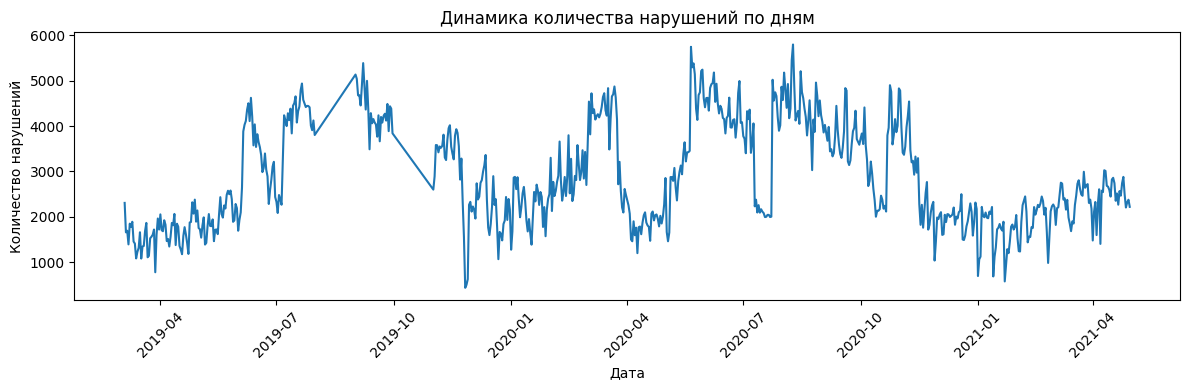

In [142]:
daily_counts = (
    df
    .groupby('normalized_date')   
    .size()                      
    .reset_index(name='n_violations')  
)
plt.figure(figsize=(12, 4))

plt.plot(
    daily_counts['normalized_date'],
    daily_counts['n_violations']
)

plt.xlabel('Дата')
plt.ylabel('Количество нарушений')
plt.title('Динамика количества нарушений по дням')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

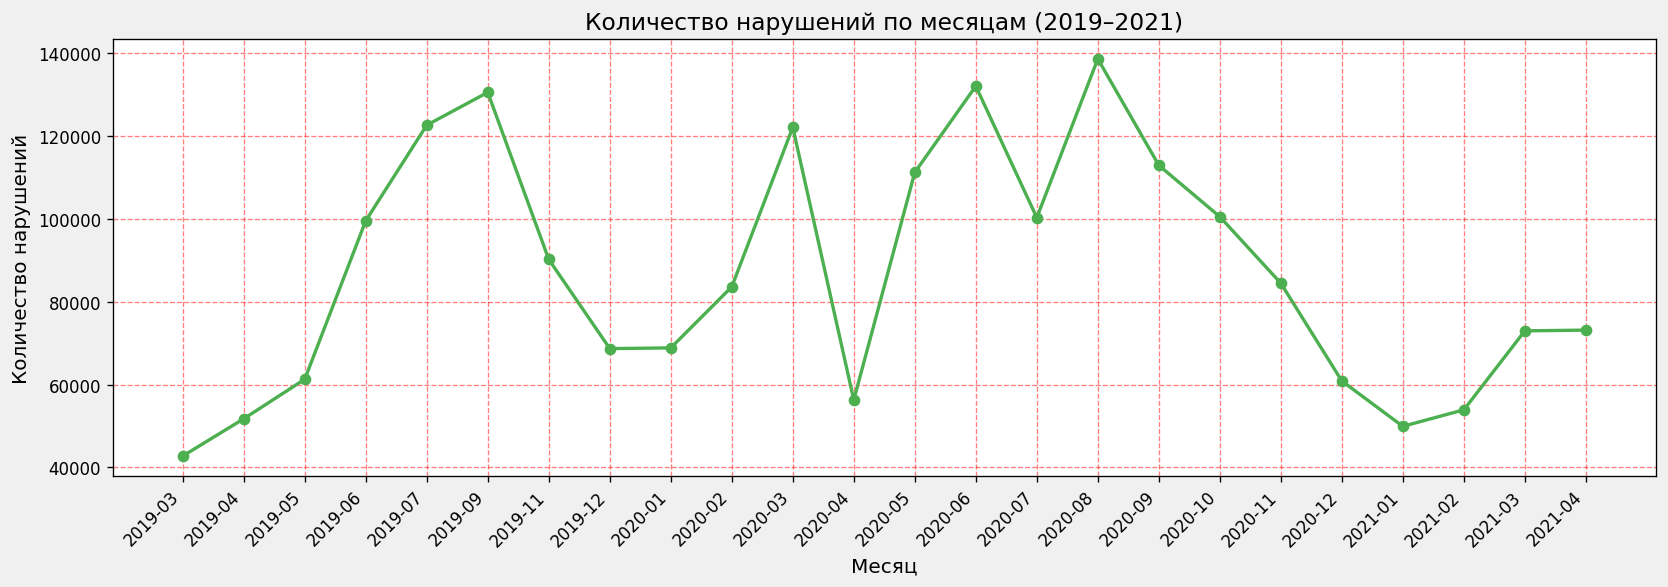

In [143]:
monthly_counts = (
    df
    .groupby(['year', 'month'])
    .size()
    .reset_index(name='n_violations')
    .sort_values(['year', 'month'])
)
monthly_counts['year_month'] = (
    monthly_counts['year'].astype(str)
    + '-'
    + monthly_counts['month'].astype(str).str.zfill(2)  
)

x = range(len(monthly_counts))
y = monthly_counts['n_violations']

fig, ax = plt.subplots(figsize=(14, 5), dpi=120)

fig.patch.set_facecolor('#f0f0f0')

ax.plot(
    x,
    y,
    marker='o',
    linewidth=2,
    color='#4caf50'                 
)

ax.grid(True, linestyle='--', alpha=0.4)

ax.set_xlabel('Месяц', fontsize=12)
ax.set_ylabel('Количество нарушений', fontsize=12)
ax.set_title('Количество нарушений по месяцам (2019–2021)', fontsize=14)

step = max(1, len(monthly_counts) // 20)

ax.set_xticks(x[::step])
ax.set_xticklabels(
    monthly_counts['year_month'].iloc[::step],
    rotation=45,
    ha='right'
)
ax.grid(True, linestyle='--', color='red', alpha=0.5)
plt.tight_layout()
plt.show()

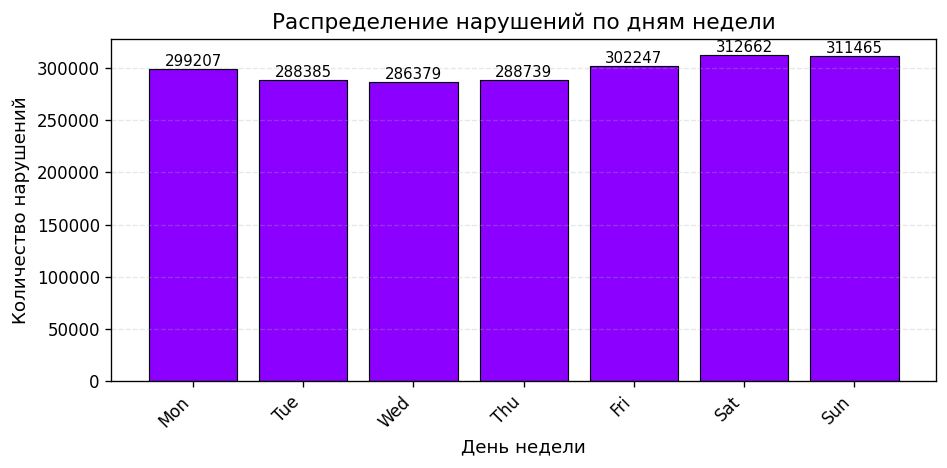

In [144]:
weekday_counts = (
    df
    .groupby(['weekday_name'])
    .size()
    .reset_index(name='n_violations')
    .sort_values('weekday_name')
)
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

weekday_counts['weekday_name'] = pd.Categorical(
    weekday_counts['weekday_name'],
    categories=order,
    ordered=True
)

weekday_counts = weekday_counts.sort_values('weekday_name')
fig, ax = plt.subplots(figsize=(8, 4), dpi=120)
bars = ax.bar(
    weekday_counts['weekday_name'],
    weekday_counts['n_violations'],
    color='#8B00FF',      
    edgecolor='black',    
    linewidth=0.7
)

ax.set_xlabel('День недели', fontsize=11)
ax.set_ylabel('Количество нарушений', fontsize=11)
ax.set_title('Распределение нарушений по дням недели', fontsize=13)

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height,                             
        f'{int(height)}',                   
        ha='center', va='bottom',          
        fontsize=9
    )

ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


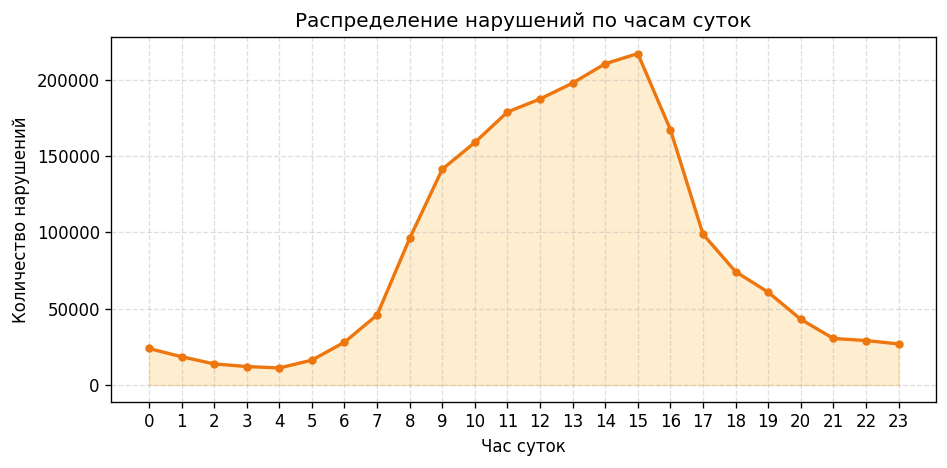

In [145]:
hour_counts = (
    df
    .groupby('hour')
    .size()
    .reset_index(name='n_violations')
    .sort_values('hour')
)

plt.figure(figsize=(8, 4), dpi=120)

x = hour_counts['hour']
y = hour_counts['n_violations']

plt.plot(x, y, marker='o', linewidth=2, color='#ED760E', markersize=4)

plt.fill_between(
    x,
    y,
    alpha=0.25,        
    color='#FFB841'    
)

plt.xlabel('Час суток')
plt.ylabel('Количество нарушений')
plt.title('Распределение нарушений по часам суток')

plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

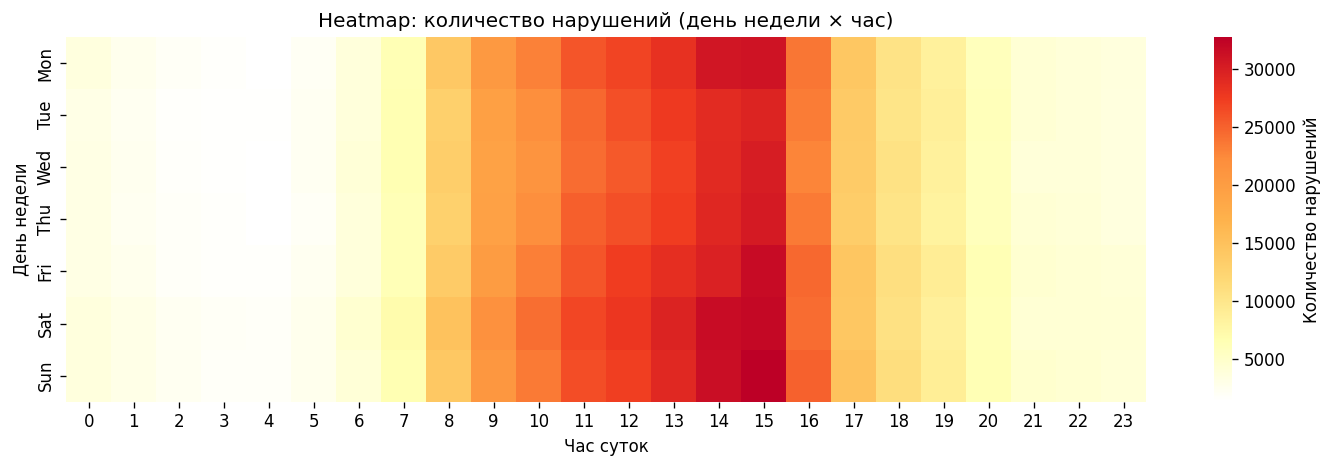

In [146]:


pivot = (
    df
    .groupby(['weekday', 'hour'])
    .size()
    .reset_index(name='n_violations')
    .pivot(index='weekday', columns='hour', values='n_violations')
    .fillna(0)
)

colors = [
    '#ffffff',
    '#ffffb2',
    '#fed976',
    '#feb24c',
    '#fd8d3c',
    '#f03b20',
    '#bd0026'
]
custom_cmap = LinearSegmentedColormap.from_list(
    'white_yellow_orange_red',
    colors
)

weekday_labels = (
    df[['weekday', 'weekday_name']]
    .drop_duplicates()
    .sort_values('weekday')['weekday_name']
    .tolist()
)

pivot_sns = pivot.copy()
pivot_sns.index = weekday_labels  

plt.figure(figsize=(12, 4), dpi=120)

sns.heatmap(
    pivot_sns,
    cmap=custom_cmap,
    cbar_kws={'label': 'Количество нарушений'} 
)

plt.xlabel('Час суток')
plt.ylabel('День недели')
plt.title('Heatmap: количество нарушений (день недели × час)')

plt.xticks(
    ticks=np.arange(0.5, 24.5),      
    labels=np.arange(0, 24)          
)

plt.tight_layout()
plt.show()


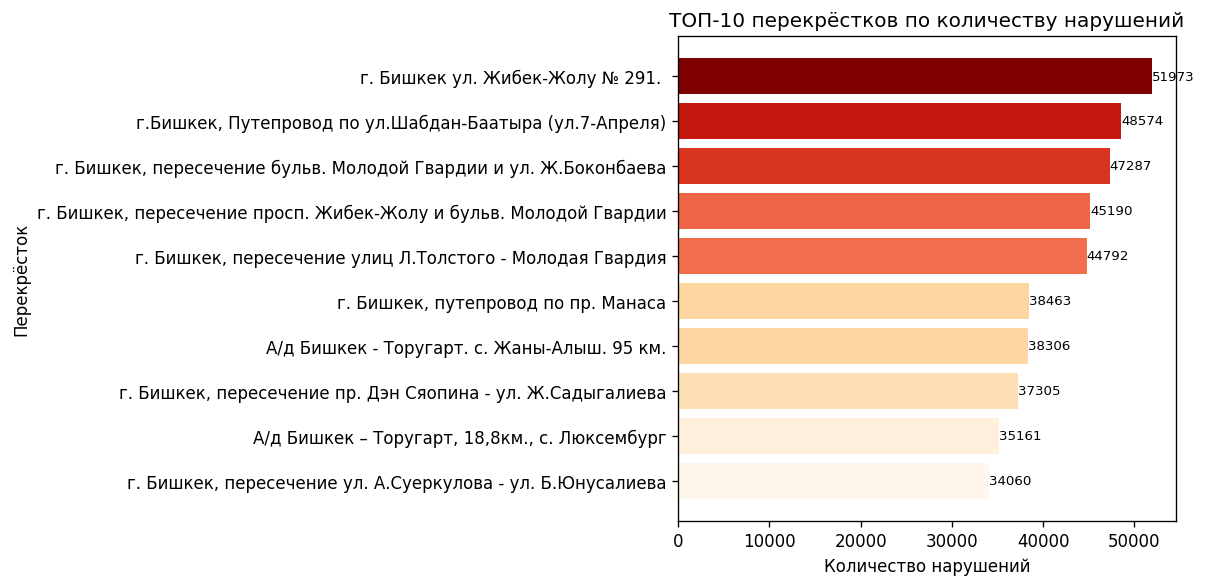

In [147]:
import matplotlib.colors as mcolors

top_crossroads = (
    df['crossroad_name']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)  
)

values = top_crossroads.values

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())

cmap = plt.cm.OrRd

colors = cmap(norm(values))

plt.figure(figsize=(10, 5), dpi=120)

plt.barh(top_crossroads.index, top_crossroads.values, color=colors)

plt.xlabel('Количество нарушений')
plt.ylabel('Перекрёсток')
plt.title('ТОП-10 перекрёстков по количеству нарушений')

for i, v in enumerate(top_crossroads.values):
    plt.text(v, i, str(v), va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()


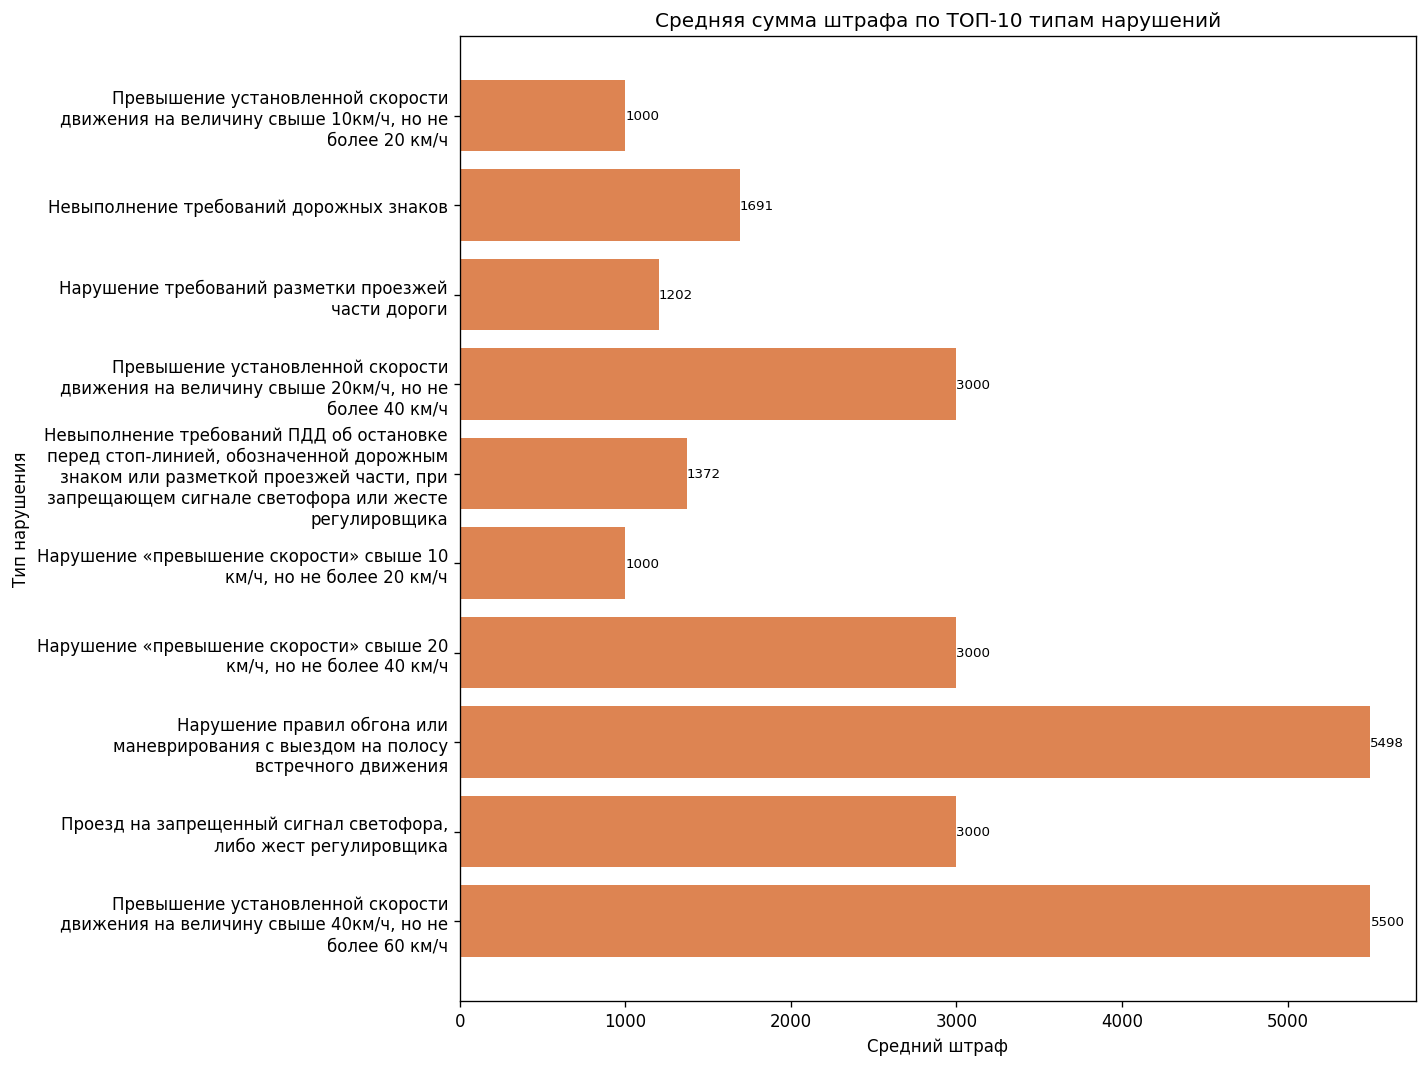

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

top_protos_counts = (
    df['violation_protocol_name']
    .value_counts()
    .head(10)                      
    .sort_values(ascending=True)    
)

top_proto_names = top_protos_counts.index 

proto_mean_fine = (
    df[df['violation_protocol_name'].isin(top_proto_names)]
    .groupby('violation_protocol_name')['violation_ammount']
    .mean()
    .loc[top_proto_names]     
)

wrapped_labels = [textwrap.fill(name, 40) for name in proto_mean_fine.index]

plt.figure(figsize=(12, 9), dpi=120)

y_pos = np.arange(len(proto_mean_fine))

plt.barh(y_pos, proto_mean_fine.values, color='#dd8452')

plt.xlabel('Средний штраф')
plt.ylabel('Тип нарушения')
plt.title('Средняя сумма штрафа по ТОП-10 типам нарушений')

plt.yticks(y_pos, wrapped_labels)

for i, v in enumerate(proto_mean_fine.values):
    plt.text(v, i, f'{v:.0f}', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()

In [149]:
cross_counts = (
    df
    .groupby(['crossroad_name', 'latitude', 'longitude'])
    .size()
    .reset_index(name='n_violations')
    .sort_values('n_violations', ascending=False)
)
cross_counts


,crossroad_name,latitude,longitude,n_violations
0,г. Бишкек ул. Жибек-Жолу № 291.,42.886356,74.625874,51973
19,"г.Бишкек, Путепровод по ул.Шабдан-Баатыра (ул....",42.867031,74.636661,48574
1,"г. Бишкек, пересечение бульв. Молодой Гвардии ...",42.868335,74.575132,47287
9,"г. Бишкек, пересечение просп. Жибек-Жолу и бул...",42.884736,74.576391,45190
14,"г. Бишкек, пересечение улиц Л.Толстого - Молод...",42.866329,74.574666,44792
18,"г. Бишкек, путепровод по пр. Манаса",42.866261,74.587268,38463
3,"г. Бишкек, пересечение пр. Дэн Сяопина - ул. Ж...",42.874280,74.523351,37305
10,"г. Бишкек, пересечение ул. А.Суеркулова - ул. ...",42.835588,74.622127,34060
6,"г. Бишкек, пересечение пр. Чуй - бул. Молодой ...",42.877192,74.575236,31506
16,"г. Бишкек, пересечение улиц Чуй - Шопокова",42.875553,74.615181,30794


Общие координаты центра:
42.875426, 74.603667


In [150]:
import folium

bishkek_center = [42.875426, 74.603667]

m = folium.Map(location=bishkek_center, zoom_start=12, tiles='OpenStreetMap')

subset = cross_counts.sort_values('n_violations', ascending=False)

max_viol = subset['n_violations'].max()

for _, row in subset.iterrows():
    radius = 5 + (row['n_violations'] / max_viol) * 15

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=(
            f"{row['crossroad_name']}<br>"
            f"Нарушений: {row['n_violations']}"
        )
    ).add_to(m)

m 

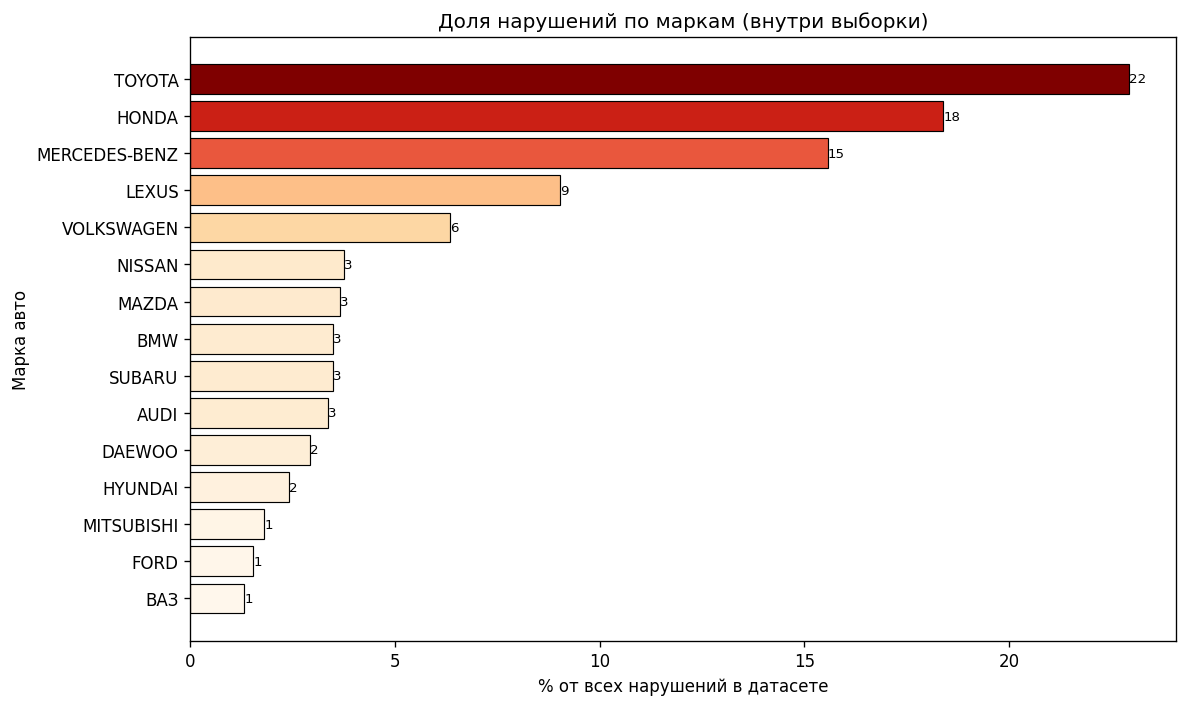

In [156]:

df['car_brand_clean'] = df['car_brand'].fillna('Unknown')

top_brands = (
    df['car_brand_clean']
    .value_counts()
    .head(15)                   
    .sort_values(ascending=True) 
)

values =  (
    top_brands / top_brands.sum()
).sort_values(ascending=True)
brands = top_brands.index

norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())
cmap = plt.cm.OrRd
colors = cmap(norm(values))

fig, ax = plt.subplots(figsize=(10, 6), dpi=120)

bars = ax.barh(brands, values*100, color=colors, edgecolor='black', linewidth=0.7)

ax.set_xlabel('% от всех нарушений в датасете')
ax.set_ylabel('Марка авто')
ax.set_title('Доля нарушений по маркам (внутри выборки)')

for bar in bars:
    w = bar.get_width()
    ax.text(w, bar.get_y() + bar.get_height()/2,
            f'{int(w)}', va='center', ha='left', fontsize=8)

plt.tight_layout()
plt.show()